# Bild som data

In [1]:
# Hur man visar en bild i matplotlib
import matplotlib.image as img
import matplotlib.pyplot as plt
import numpy as np

from skimage import data # Scikit-image har en massa testbilder

In [2]:
image = img.imread('lenasmall.png')

In [3]:
image[0][:4]

array([[0.88235295, 0.5254902 , 0.48235294, 1.        ],
       [0.8784314 , 0.5176471 , 0.45490196, 1.        ],
       [0.8627451 , 0.50980395, 0.41568628, 1.        ],
       [0.8627451 , 0.49803922, 0.42745098, 1.        ]], dtype=float32)

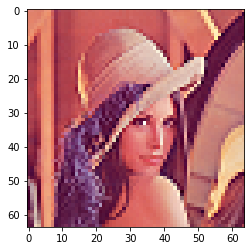

In [4]:
# Hur man visar bilden
plt.imshow(image)
plt.show()

In [5]:
print("DATA TYPE: ",image.dtype)
print("IMAGE SIZE: ",image.shape)

DATA TYPE:  float32
IMAGE SIZE:  (64, 64, 4)


In [6]:
# float 32 är okej, men vi konverterar till 8bitars integer värde istället

In [7]:
image[0,0]*255

array([225., 134., 123., 255.], dtype=float32)

In [8]:
image_int = np.int_(image[0,0]*255) # fungerar inte med int(), varför?
image_int

array([225, 134, 123, 255])

In [9]:
type(image_int[0])

numpy.int64

In [10]:
image_int = np.int_(image*255)
image_int[0][:3]

array([[225, 134, 123, 255],
       [224, 132, 116, 255],
       [220, 130, 106, 255]])

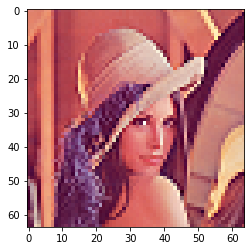

In [11]:
plt.imshow(image_int)
plt.show()

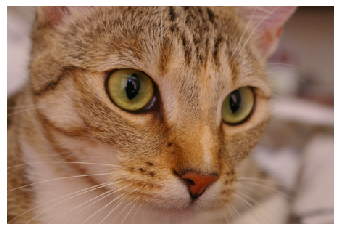

In [12]:
cat = data.chelsea()
plt.imshow(cat)
plt.axis("off")
plt.show()

In [13]:
cat[0][:3]

array([[143, 120, 104],
       [143, 120, 104],
       [141, 118, 102]], dtype=uint8)

In [14]:
64*64*4 # lenasmall är bara 12288 varför, en byte per pixel per färgkanal.

16384

In [15]:
64*64*3 #  alfakanalen har alla värden som 255 då sparas de inte och sparar utrymme

12288

# Test med RGBA

In [16]:
image2 = img.imread('lenargba.png')
image2 = np.int_(image2*255)
image2.shape

(64, 64, 4)

In [17]:
print(image2[0][:3]) # Första raden, 3 första pixlarna

[[225 135 123 237]
 [224 132 118 236]
 [221 131 106 235]]


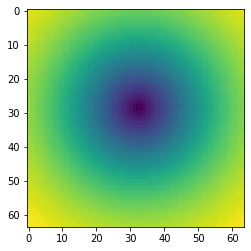

In [18]:
image2_arr = image2[:,:,3] # alfakanalen kan gömma en hemlig bild, använd t.ex gimp
plt.imshow(image2_arr)
plt.show()

### Colormaps, Color limits and Histogram

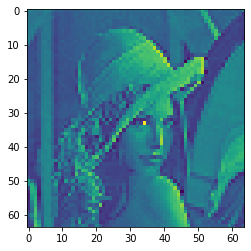

In [19]:
image2_arr = image2[:,:,2] # alfakanalen kan gömma en hemlig bild, använd t.ex gimp 0-3 =>> r g b a
plt.imshow(image2_arr)
plt.show()

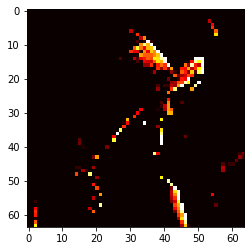

In [20]:
plt.imshow(image2_arr, cmap="hot", clim=(170,200)) # kan vara bra att illustrerar gömda meddelandet

### Histogram
numpy ravel() metoden

In [21]:
a = np.arange(8).reshape(2,4) 
a

array([[0, 1, 2, 3],
       [4, 5, 6, 7]])

In [22]:
a.ravel() #returns a flattened continuous array

array([0, 1, 2, 3, 4, 5, 6, 7])

In [23]:
image_int.ravel()

array([225, 134, 123, ...,  66,  79, 255])

In [24]:
def histogram_show(channel):
    """
    channel skall vara mellan 0-3 (int). 0 = r, 1 = g, 2 = b, 3 = a
    
    """
    value = image_int[:,:,channel].ravel()
    plt.hist(value, bins=128)
    plt.show()

In [25]:
help(histogram_show)

Help on function histogram_show in module __main__:

histogram_show(channel)
    channel skall vara mellan 0-3 (int). 0 = r, 1 = g, 2 = b, 3 = a



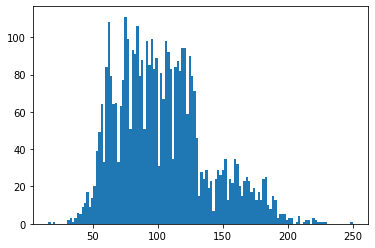

In [26]:
histogram_show(channel=2)

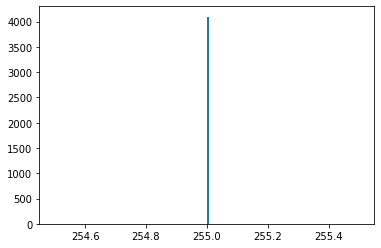

In [27]:
histogram_show(channel=3)

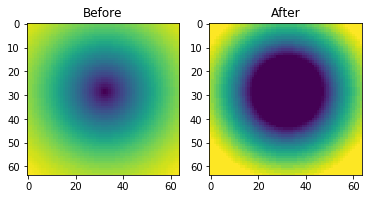

In [28]:
fig = plt.figure()
a = fig.add_subplot(1,2,1) # rows, columns, index (index = var vi vill rita)
plt.imshow(image2[:,:,3])
a.set_title('Before')

b = fig.add_subplot(1,2,2) # flytta index till 2, dvs. after kommer till höger om before
plt.imshow(image2[:,:,3], clim=(180,230))
b.set_title('After')
plt.show()